<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-0.045271,77.393324,77.468698,-0.075375
1,0.0,1.0,26.388063,1.047955,37.436018,36.344192,1.091826
2,0.0,2.0,61.016701,0.000527,71.017228,71.035232,-0.018004
3,0.0,3.0,21.594724,0.256842,31.851566,31.542215,0.309351
4,0.0,4.0,36.457840,0.124512,46.582351,46.432115,0.150237
...,...,...,...,...,...,...,...
29995,999.0,25.0,96.056280,-0.477764,105.578517,105.856995,-0.278478
29996,999.0,26.0,37.602978,-0.373227,47.229752,47.587219,-0.357467
29997,999.0,27.0,89.073667,-0.098287,98.975380,98.896305,0.079075
29998,999.0,28.0,28.990977,0.600098,39.591075,39.002257,0.588818


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.438595 -0.045271   77.393324   77.468698 -0.075375
      1.0    26.388063  1.047955   37.436018   36.344192  1.091826
      2.0    61.016701  0.000527   71.017228   71.035232 -0.018004
      3.0    21.594724  0.256842   31.851566   31.542215  0.309351
      4.0    36.457840  0.124512   46.582351   46.432115  0.150237
...                ...       ...         ...         ...       ...
999.0 25.0   96.056280 -0.477764  105.578517  105.856995 -0.278478
      26.0   37.602978 -0.373227   47.229752   47.587219 -0.357467
      27.0   89.073667 -0.098287   98.975380   98.896305  0.079075
      28.0   28.990977  0.600098   39.591075   39.002257  0.588818
      29.0   68.474565 -0.492564   77.982001   78.361878 -0.379877

[30000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.438595 -0.045271   77.393324   77.468698 -0.075375
      1.0    26.388063  1.047955   37.436018   36.344192  1.091826
      2.0    61.016701  0.000527   71.017228   71.035232 -0.018004
      3.0    21.594724  0.256842   31.851566   31.542215  0.309351
      4.0    36.457840  0.124512   46.582351   46.432115  0.150237
...                ...       ...         ...         ...       ...
999.0 25.0   96.056280 -0.477764  105.578517  105.856995 -0.278478
      26.0   37.602978 -0.373227   47.229752   47.587219 -0.357467
      27.0   89.073667 -0.098287   98.975380   98.896305  0.079075
      28.0   28.990977  0.600098   39.591075   39.002257  0.588818
      29.0   68.474565 -0.492564   77.982001   78.361878 -0.379877

[30000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-0.045271,77.393324,77.468698,-0.075375
1,0.0,1.0,26.388063,1.047955,37.436018,36.344192,1.091826
2,0.0,2.0,61.016701,0.000527,71.017228,71.035232,-0.018004
3,0.0,3.0,21.594724,0.256842,31.851566,31.542215,0.309351
4,0.0,4.0,36.457840,0.124512,46.582351,46.432115,0.150237
...,...,...,...,...,...,...,...
29995,999.0,25.0,96.056280,-0.477764,105.578517,105.856995,-0.278478
29996,999.0,26.0,37.602978,-0.373227,47.229752,47.587219,-0.357467
29997,999.0,27.0,89.073667,-0.098287,98.975380,98.896305,0.079075
29998,999.0,28.0,28.990977,0.600098,39.591075,39.002257,0.588818


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    67.438595 -0.045271   77.393324   77.468698 -0.075375
      1.0    26.388063  1.047955   37.436018   36.344192  1.091826
      2.0    61.016701  0.000527   71.017228   71.035232 -0.018004
      3.0    21.594724  0.256842   31.851566   31.542215  0.309351
      4.0    36.457840  0.124512   46.582351   46.432115  0.150237
...                ...       ...         ...         ...       ...
999.0 25.0   96.056280 -0.477764  105.578517  105.856995 -0.278478
      26.0   37.602978 -0.373227   47.229752   47.587219 -0.357467
      27.0   89.073667 -0.098287   98.975380   98.896305  0.079075
      28.0   28.990977  0.600098   39.591075   39.002257  0.588818
      29.0   68.474565 -0.492564   77.982001   78.361878 -0.379877

[30000 rows x 5 columns]

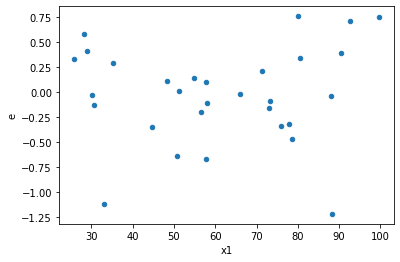

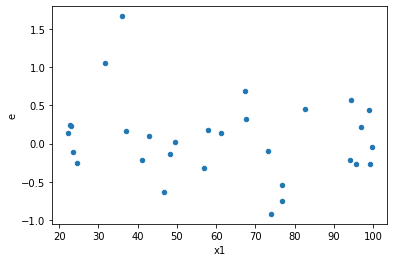

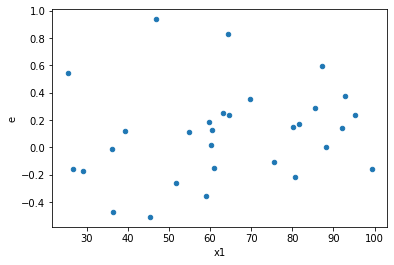

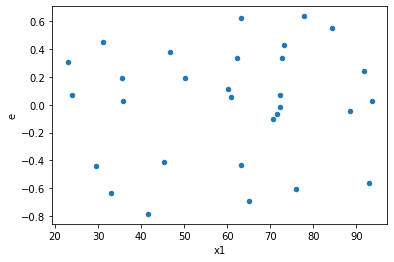

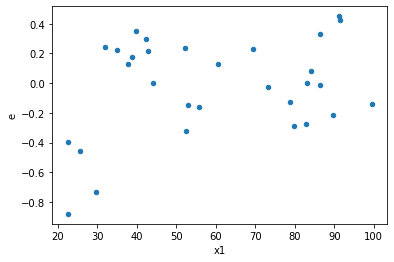

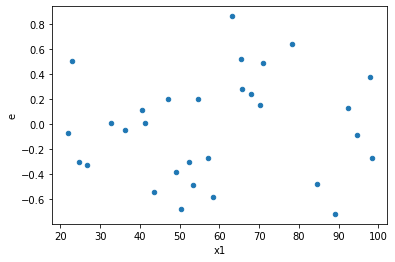

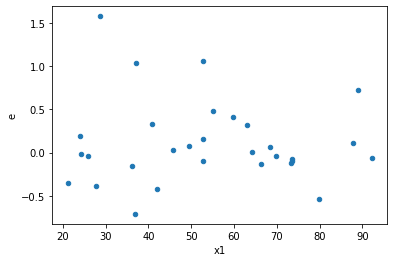

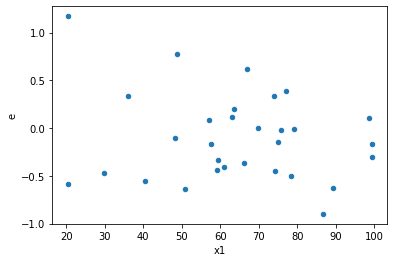

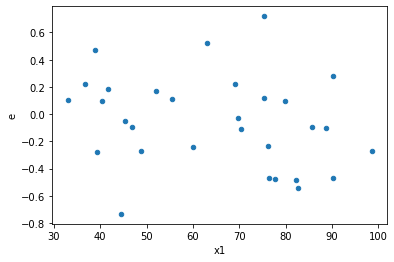

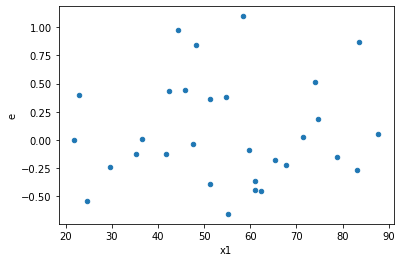

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,9.0,19.0,0.7070741380205132,3.5507216223196107,0.07856379311339036,0.18688008538524267,2.3787049731104566,0.10707404162324696,0.9464629791883765,0.05353702081162348,Reject005=1 : Homoscedasticity
6.0,12.0,16.0,1.0436572024126094,4.785846902400141,0.08697143353438412,0.2991154314000088,3.4392376812065955,0.023250999329799127,0.9883745003351004,0.011625499664899563,Reject005=0 : Heteroscedasticity
7.0,15.0,13.0,2.51145712318956,2.8206330217104774,0.167430474879304,0.21697177090080594,1.2958917488421084,0.6454200425716443,0.6772899787141778,0.32271002128582216,Reject005=1 : Homoscedasticity
9.0,15.0,13.0,1.9472650179545832,2.2078798710551277,0.12981766786363888,0.16983691315808674,1.308272717828241,0.6330897118421266,0.6834551440789367,0.3165448559210633,Reject005=1 : Homoscedasticity
10.0,15.0,13.0,2.6605083115658354,3.5322397372214276,0.17736722077105568,0.2717107490170329,1.5319107320723888,0.4459499844651451,0.7770250077674274,0.22297499223257256,Reject005=1 : Homoscedasticity
12.0,11.0,17.0,0.6324178057129015,2.6308946529421577,0.05749252779208196,0.15475850899659752,2.6918021339446363,0.06517407793498498,0.9674129610325075,0.03258703896749249,Reject005=1 : Homoscedasticity
13.0,18.0,10.0,2.9016796242138794,1.8338398388171533,0.16120442356743775,0.18338398388171534,1.137586548950991,0.8636164352144109,0.5681917823927946,0.43180821760720545,Reject005=1 : Homoscedasticity
14.0,12.0,16.0,0.7666292686946485,1.7842692538734521,0.06388577239122072,0.11151682836709076,1.7455659404755914,0.2955256264871631,0.8522371867564185,0.14776281324358154,Reject005=1 : Homoscedasticity
18.0,12.0,16.0,1.0424035023441725,1.8365999766135501,0.08686695852868104,0.11478749853834688,1.3214172624732483,0.5923878529590598,0.7038060735204701,0.2961939264795299,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,16.0,3.234849703888735,2.4686258852498852,0.2695708086573946,0.15428911782811783,0.5723509848731744,0.33219278088207943,Reject005=1 : Homoscedasticity
1.0,15.0,13.0,5.062920266619913,2.0950951645767346,0.33752801777466085,0.16116116650590268,0.4774749295434682,0.1723399128633869,Reject005=1 : Homoscedasticity
2.0,16.0,12.0,2.674796264553474,1.7996757275549242,0.16717476653459212,0.14997297729624368,0.8971029564154407,0.8228319764455523,Reject005=1 : Homoscedasticity
3.0,14.0,14.0,4.23659460243589,2.673488919335029,0.30261390017399215,0.19096349423821635,0.6310466707855098,0.3995478665194011,Reject005=1 : Homoscedasticity
4.0,9.0,19.0,0.7070741380205132,3.5507216223196107,0.07856379311339036,0.18688008538524267,2.3787049731104566,0.10707404162324696,Reject005=1 : Homoscedasticity
5.0,16.0,12.0,3.5597600514107834,2.4161623806214116,0.22248500321317397,0.2013468650517843,0.9049907281115206,0.8352948198995276,Reject005=1 : Homoscedasticity
6.0,12.0,16.0,1.0436572024126094,4.785846902400141,0.08697143353438412,0.2991154314000088,3.4392376812065955,0.023250999329799127,Reject005=0 : Heteroscedasticity
7.0,15.0,13.0,2.51145712318956,2.8206330217104774,0.167430474879304,0.21697177090080594,1.2958917488421084,0.6454200425716443,Reject005=1 : Homoscedasticity
8.0,20.0,8.0,3.087677706222774,1.1899252539572371,0.1543838853111387,0.14874065674465464,0.9634467771353795,0.8828825867641105,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      906
Reject005=0 : Heteroscedasticity     94
Name: Result_test, dtype: int64